In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

In [71]:
r_all = []
n = np.array([1000, 10000])
N = np.array([x for x in range(1, 65)])
for x in n:
    r_n = []
    for y in N:
        #for z in range(10):
        z=1
        np.random.seed(y*z)
        r = np.random.randint(0, y*x, x)
        num_unique = len(np.unique(r))
        r_n.append(num_unique)
    r_all.append(r_n)   

In [72]:
print(np.array(r_all).shape)
print(r_all[0])
print(r_all[1])

(2, 64)
[639, 808, 861, 885, 911, 932, 928, 932, 950, 952, 957, 959, 960, 976, 975, 969, 973, 974, 974, 971, 974, 972, 977, 978, 989, 977, 979, 978, 984, 989, 986, 982, 985, 993, 989, 982, 987, 988, 992, 990, 990, 991, 987, 989, 993, 990, 996, 990, 986, 996, 991, 986, 986, 991, 987, 987, 987, 992, 993, 994, 994, 990, 988, 992]
[6280, 7869, 8479, 8872, 9064, 9205, 9307, 9409, 9488, 9515, 9558, 9584, 9621, 9660, 9710, 9708, 9735, 9725, 9713, 9759, 9748, 9783, 9795, 9778, 9811, 9808, 9835, 9838, 9838, 9835, 9845, 9858, 9849, 9852, 9881, 9847, 9854, 9872, 9867, 9881, 9866, 9871, 9869, 9898, 9893, 9899, 9901, 9890, 9891, 9901, 9905, 9895, 9924, 9914, 9916, 9906, 9921, 9911, 9915, 9910, 9919, 9917, 9914, 9939]


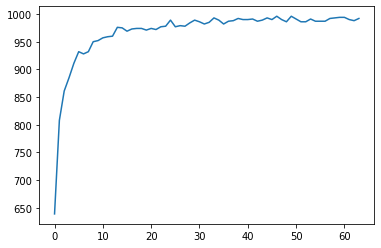

In [74]:
plt.plot(r_all[0])
plt.show()

## **Our Formula**

In [117]:
def unique_values(n, N):
    import math
    answer = n - (n - N*(1 - ((N-1)/N)**n))
    return answer

test = unique_values(10000, 10000)
print(test)

6321.389535670295


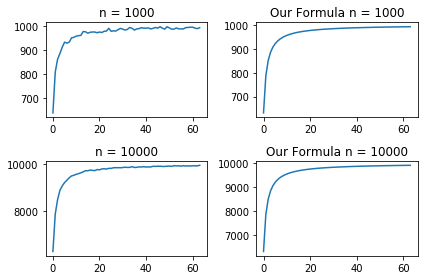

In [132]:
plt.subplot(221)
plt.title('n = 1000')
plt.plot(r_all[0])


plt.subplot(223)
plt.title('n = 10000')
plt.plot(r_all[1])

r_for = []
for x in n:
    r_n = []
    for y in N:
        num_unique = unique_values(x, y*x)
        r_n.append(num_unique)
    r_for.append(r_n)

plt.subplot(222)
plt.plot(r_for[0])
plt.title('Our Formula n = 1000')
plt.tight_layout()

plt.subplot(224)
plt.plot(r_for[1])
plt.title('Our Formula n = 10000')
plt.tight_layout()

plt.show()


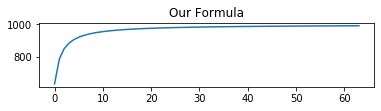

In [127]:
r_for = []
for x in n:
    r_n = []
    for y in N:
        num_unique = unique_values(x, y*x)
        r_n.append(num_unique)
    r_for.append(r_n)

plt.subplot(313)
plt.plot(r_for[0])
plt.title('Our Formula')
plt.show()

In [78]:
print(np.mean(r_all), np.median(r_all), np.var(r_all), np.std(r_all))

5316.75 3638.0 19069696.609375 4366.886374681049


In [118]:
print(n, N)

[ 1000 10000] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


In [120]:
r_for

[[632.3045752290362,
  787.09035431981,
  850.5255133897941,
  884.894232518651,
  906.4281177844125,
  921.1801981487683,
  931.9166271803025,
  940.0799397612234,
  946.4958654949684,
  951.6710644144378,
  955.9336279034712,
  959.5053616952666,
  962.5415933114054,
  965.1543379274387,
  967.4264094431534,
  969.4203528366608,
  971.1842870939604,
  972.7558372836343,
  974.1648471125652,
  975.4352914990849,
  976.5866515138313,
  977.6349200869174,
  978.5933492249184,
  979.473013041975,
  980.2832374864123,
  981.0319321906651,
  981.7258494937349,
  982.3707886193067,
  982.9717581193463,
  983.5331061618169,
  984.0586259135343,
  984.5516413392766,
  985.0150775705382,
  985.4515189876012,
  985.8632574323384,
  986.252332453125,
  986.6205650982346,
  986.969586400694,
  987.30086155557,
  987.6157104439409,
  987.9153252316519,
  988.2007854521371,
  988.4730709863323,
  988.7330733179978,
  988.9816052749511,
  989.219409505606,
  989.4471659154647,
  989.6654981399813,
 